# Predicting Car Prices

The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. 
Read more about the data set [here](http:https://archive.ics.uci.edu/ml/datasets/automobile)

# Introduction to the dataset

In [1]:
# Read the data
import pandas as pd

pd.options.display.max_columns = 99

cols = ['symboling', 
        'normalized-losses', 
        'make', 
        'fuel-type', 
        'aspiration', 
        'num-of-doors', 
        'body-style', 
        'drive-wheels', 
        'engine-location', 
        'wheel-base', 
        'length', 
        'width', 
        'height', 
        'curb-weight', 
        'engine-type', 
        'num-of-cylinders', 
        'engine-size', 
        'fuel-system', 
        'bore', 
        'stroke', 
        'compression-rate', 
        'horsepower', 
        'peak-rpm', 
        'city-mpg', 
        'highway-mpg', 
        'price']

cars = pd.read_csv('imports-85.data', names=cols)
cars.columns
cars.head(1)

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   

    body-style drive-wheels engine-location  wheel-base  length  width  \
0  convertible          rwd           front        88.6   168.8   64.1   

   height  curb-weight engine-type num-of-cylinders  engine-size fuel-system  \
0    48.8         2548        dohc             four          130        mpfi   

   bore stroke  compression-rate horsepower peak-rpm  city-mpg  highway-mpg  \
0  3.47   2.68               9.0        111     5000        21           27   

   price  
0  13495

In [2]:
# Display first few rows
cars.head(5)

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  length  width  \
0  convertible          rwd           front        88.6   168.8   64.1   
1  convertible          rwd           front        88.6   168.8   64.1   
2    hatchback          rwd           front        94.5   171.2   65.5   
3        sedan          fwd           front        99.8   176.6   66.2   
4        sedan          4wd           front        99.4   176.6   66.4   

   height  curb-weight engine-type num-of-cylinders  engine-size fuel-system  \
0    48.8         2548        dohc             four          130        mpfi   
1    48.8         2548        dohc             four          130        mpfi   
2    52.4         2823        ohcv              six          152        mpfi   
3    54.3         2337         ohc             four          109        mpfi   
4    54.3         2824         ohc             five          136        mpfi   

   bore stroke  compression-rate horsepower peak-rpm  city-mpg  highway-mpg  \
0  3.47   2.68               9.0        111     5000        21           27   
1  3.47   2.68               9.0        111     5000        21           27   
2  2.68   3.47               9.0        154     5000        19           26   
3  3.19   3.40              10.0        102     5500        24           30   
4  3.19   3.40               8.0        115     5500        18           22   

   price  
0  13495  
1  16500  
2  16500  
3  13950  
4  17450

In [3]:
# Determine the columns are numeric
# Target column: price
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [4]:
# Select only the columns with continuous values from 
# https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names
continuous_values_cols = ['normalized-losses', 
                          'wheel-base', 
                          'length', 
                          'width', 
                          'height', 
                          'curb-weight', 
                          'bore', 
                          'stroke', 
                          'compression-rate', 
                          'horsepower', 
                          'peak-rpm', 
                          'city-mpg', 
                          'highway-mpg', 
                          'price']
numeric_cars = cars[continuous_values_cols]
numeric_cars.head(5)

normalized-losses  wheel-base  length  width  height  curb-weight  bore  \
0                 ?        88.6   168.8   64.1    48.8         2548  3.47   
1                 ?        88.6   168.8   64.1    48.8         2548  3.47   
2                 ?        94.5   171.2   65.5    52.4         2823  2.68   
3               164        99.8   176.6   66.2    54.3         2337  3.19   
4               164        99.4   176.6   66.4    54.3         2824  3.19   

  stroke  compression-rate horsepower peak-rpm  city-mpg  highway-mpg  price  
0   2.68               9.0        111     5000        21           27  13495  
1   2.68               9.0        111     5000        21           27  16500  
2   3.47               9.0        154     5000        19           26  16500  
3   3.40              10.0        102     5500        24           30  13950  
4   3.40               8.0        115     5500        18           22  17450

# Data Cleaning

In [5]:
import numpy as np

# Replace all "?" values with np.nan missing value
numeric_cars['normalized-losses'].value_counts()
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars['normalized-losses'].value_counts(dropna=False)

NaN    41
161    11
91      8
150     7
128     6
104     6
134     6
103     5
74      5
65      5
85      5
168     5
95      5
102     5
94      5
148     4
106     4
118     4
122     4
93      4
101     3
154     3
137     3
83      3
115     3
125     3
164     2
194     2
89      2
108     2
113     2
87      2
119     2
197     2
81      2
145     2
192     2
129     2
153     2
158     2
110     2
188     2
77      1
90      1
256     1
107     1
98      1
186     1
231     1
78      1
121     1
142     1
Name: normalized-losses, dtype: int64

In [6]:
numeric_cars.dtypes

normalized-losses     object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [7]:
# Convert columns to numeric types
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
# Because `price` is the column we want to predict, 
# we remove any rows with missing `price` values.
# numeric_cars = numeric_cars[numeric_cars['price'].notnull()]
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [9]:
# Replace missing values in other columns using column means.
print(numeric_cars.mean())
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

normalized-losses      122.000000
wheel-base              98.797015
length                 174.200995
width                   65.889055
height                  53.766667
curb-weight           2555.666667
bore                     3.330711
stroke                   3.256904
compression-rate        10.164279
horsepower             103.396985
peak-rpm              5117.587940
city-mpg                25.179104
highway-mpg             30.686567
price                13207.129353
dtype: float64


In [10]:
# Confirm that there's no more missing values!
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [11]:
# Normalize all columnns to range 
# from 0 to 1 except the target column.
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

numeric_cars.head(5)

normalized-losses  wheel-base    length     width    height  curb-weight  \
0           0.298429    0.058309  0.413433  0.324786  0.083333     0.411171   
1           0.298429    0.058309  0.413433  0.324786  0.083333     0.411171   
2           0.298429    0.230321  0.449254  0.444444  0.383333     0.517843   
3           0.518325    0.384840  0.529851  0.504274  0.541667     0.329325   
4           0.518325    0.373178  0.529851  0.521368  0.541667     0.518231   

       bore    stroke  compression-rate  horsepower  peak-rpm  city-mpg  \
0  0.664286  0.290476            0.1250    0.294393  0.346939  0.222222   
1  0.664286  0.290476            0.1250    0.294393  0.346939  0.222222   
2  0.100000  0.666667            0.1250    0.495327  0.346939  0.166667   
3  0.464286  0.633333            0.1875    0.252336  0.551020  0.305556   
4  0.464286  0.633333            0.0625    0.313084  0.551020  0.138889   

   highway-mpg    price  
0     0.289474  13495.0  
1     0.289474  16500.0  
2     0.263158  16500.0  
3     0.368421  13950.0  
4     0.157895  17450.0

# Univariate Model

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val

# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

In [13]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885394,
  5: 4037.0377131537603,
  7: 4353.811860277134,
  9: 4515.135617419103},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  

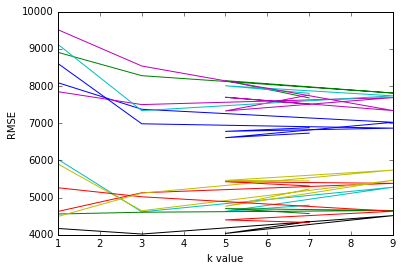

In [14]:
# Visualize the results using a scatter plot or line plot
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

# Multivariate Model

In [15]:
# Compute average RMSE 
# across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    feature_avg_rmse[k] = np.mean(list(v.values()))
    
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

In [16]:
# knn_train_test accepts lists of column names
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

# Use the best `2` features from the previous step 
# to train and test a multivariate k-nearest 
# neighbors model using the default k value.
two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test(two_best_features, 'price', numeric_cars)
k_rmse_results["two best features"] = rmse_val

# Use the best `3` features from the previous step 
# to train and test a multivariate k-nearest 
# neighbors model using the default k value.
three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

# Use the best `4` features from the previous step 
# to train and test a multivariate k-nearest 
# neighbors model using the default k value.
four_best_features = ['horsepower', 'width', 'curb-weight', 'highway-mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

# Use the best `5` features from the previous step 
# to train and test a multivariate k-nearest 
# neighbors model using the default k value.
five_best_features = ['horsepower', 'width', 'curb-weight', 'highway-mpg', 'length']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

# Use the best `6` features from the previous step 
# to train and test a multivariate k-nearest 
# neighbors model using the default k value.
six_best_features = ['horsepower', 
                      'width', 
                      'curb-weight', 
                      'highway-mpg', 
                      'length',
                      'city-mpg']
rmse_val = knn_train_test(six_best_features, 'price', numeric_cars)
k_rmse_results["six best features"] = rmse_val

k_rmse_results

{'five best features': {5: 3665.546673045813},
 'four best features': {5: 3358.6915801682458},
 'six best features': {5: 3628.261188214127},
 'three best features': {5: 3305.9401397969677},
 'two best features': {5: 3589.3132622073304}}

# Hyperparameter Tuning
Optimize the model that performed the best in the previous step

In [19]:
# knn_train_test accepts lists of column names
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1,25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

# Use the best `3` features from the previous step 
# to train and test a multivariate k-nearest 
# neighbors model using the default k value.
three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

# Use the best `4` features from the previous step 
# to train and test a multivariate k-nearest 
# neighbors model using the default k value.
four_best_features = ['horsepower', 'width', 'curb-weight', 'highway-mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

# Use the best `5` features from the previous step 
# to train and test a multivariate k-nearest 
# neighbors model using the default k value.
five_best_features = ['horsepower', 'width', 'curb-weight', 'highway-mpg', 'length']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

k_rmse_results

{'five best features': {1: 2773.8991269216394,
  2: 2936.079965592973,
  3: 3152.3415515178144,
  4: 3488.57822210674,
  5: 3665.546673045813,
  6: 3563.9910249785435,
  7: 3714.642677357888,
  8: 3927.6655582704293,
  9: 4074.724411578548,
  10: 4202.692919892065,
  11: 4228.8377103033245,
  12: 4280.7222580306225,
  13: 4323.694733441248,
  14: 4341.598003940922,
  15: 4381.910642108479,
  16: 4462.210967318207,
  17: 4512.666161759793,
  18: 4549.02427742861,
  19: 4625.542238703432,
  20: 4680.4075341436155,
  21: 4769.300287838951,
  22: 4813.1714929806085,
  23: 4871.956026848068,
  24: 4922.889655107399},
 'four best features': {1: 2600.746383728188,
  2: 2725.4325072335123,
  3: 3108.8580314362966,
  4: 3217.3135209486827,
  5: 3358.6915801682458,
  6: 3633.1687033129465,
  7: 3896.127441396644,
  8: 4002.8383900652543,
  9: 4055.5309369929582,
  10: 4128.67807741542,
  11: 4249.827289347268,
  12: 4344.035898237492,
  13: 4402.995293166156,
  14: 4424.314365328619,
  15: 4442.

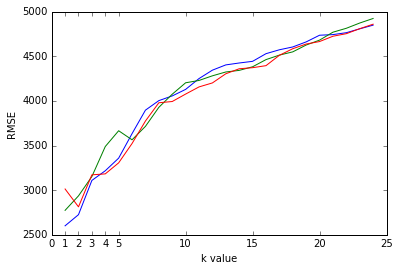

In [23]:
# Find the optimal `k` for each model

for k, v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x, y)
    plt.xlabel('k value')
    plt.xticks([0, 1, 2, 3, 4, 5, 10, 15, 20, 25])
    plt.ylabel('RMSE')

Best k values:

- Three best features: k=2
- Four best features: k=1
- Five best features: k=1